In [26]:
import os
import sys
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np

sys.path.insert(0,'/ncluster/newton')
import util as u
import importlib
importlib.reload(u)

import kfac_pytorch as kfac_lib
importlib.reload(kfac_lib)

import collections
import scipy

from PIL import Image

import matplotlib
%matplotlib inline

import math

def inv(mat, lambda_=1e-3, inverse_method='numpy',
                        use_cuda=True):
  assert mat.shape[0] == mat.shape[1]
  ii = torch.eye(mat.shape[0])
  if use_cuda:
    ii = ii.cuda()
  regmat = mat + lambda_*ii

  if inverse_method == 'numpy':
    import util as u
    result = torch.from_numpy(scipy.linalg.inv(regmat.cpu().numpy()))
    if use_cuda:
      result = result.cuda()
  elif inverse_method == 'gpu':
    assert use_cuda
    result = torch.inverse(regmat).cuda()
  else:
    assert False, 'unknown inverse_method ' + str(INVERSE_METHOD)
  return result

# Deep autoencoder

Optimize the following sigmoid autoencoder on first 10k MNIST examples, evaluate on second 10k 

![deep autoencoder](https://i.stack.imgur.com/f09ot.png)

# Short run

In [40]:
import kfac_pytorch as kfac_lib
import importlib
importlib.reload(kfac_lib)
losses_adam, vlosses_adam, model = kfac_lib.train(iters=10, kfac=True, print_interval=1)
u.summarize_time()

Step   0 loss 97.542419434
Step   1 loss 62.600799561
Step   2 loss 44.653366089
Step   3 loss 80.937736511
Step   4 loss 57.418834686
Step   5 loss 48.029850006
Step   6 loss 43.777774811
Step   7 loss 38.339965820
Step   8 loss 35.565475464
Step   9 loss 33.320713043
Times: min: 382.19, median: 384.10, mean: 481.65


In [41]:
kfac_lib.covA_saved

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([[0.3553, 0.2651, 0.2325,  ..., 0.2521, 0.2630, 0.2481],
         [0.2651, 0.3927, 0.2332,  ..., 0.2896, 0.2773, 0.2612],
         [0.2325, 0.2332, 0.2889,  ..., 0.2252, 0.2423, 0.2148],
         ...,
         [0.2521, 0.2896, 0.2252,  ..., 0.3170, 0.2464, 0.2424],
         [0.2630, 0.2773, 0.2423,  ..., 0.2464, 0.3579, 0.2462],
         [0.2481, 0.2612, 0.2148,  ..., 0.2424, 0.2462, 0.3133]],
        device='cuda:0'),
 tensor([[0.4203, 0.2584, 0.2897,  ..., 0.2530, 0.2246, 0.2810],
         [0.2584, 0.3900, 0.2580,  ..., 0.2680, 0.1971, 0.2390],
         [0.2897, 0.2580, 0.4268,  ..., 0.2739, 0.2158, 0.2936],
         ...,
         [0.2530, 0.2680, 0.2739,  ..., 0.4331, 0.2218, 0.2806],
         [0.2246

In [46]:
!conda install -c conda-forge jupyter_contrib_nbextensions -y

Solving environment: done

## Package Plan ##

  environment location: /home/ubuntu/anaconda3/envs/tensorflow_p36

  added / updated specs: 
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyter_latex_envs-1.4.4   |           py36_0         753 KB  conda-forge
    jupyter_contrib_nbextensions-0.5.0|           py36_0        19.4 MB  conda-forge
    jupyter_highlight_selected_word-0.2.0|        py36_1000          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        20.2 MB

The following NEW packages will be INSTALLED:

    jupyter_contrib_nbextensions:    0.5.0-py36_0    conda-forge
    jupyter_highlight_selected_word: 0.2.0-py36_1000 conda-forge
    jupyter_latex_envs:              1.4.4-py36_0    conda-forge


jupyter_latex_envs-1 | 753 KB    | #################

done


In [47]:
!jupyter nbextension enable toc2/main

Enabling notebook extension toc2/main...
      - Validating: OK


In [30]:
losses_adam, vlosses_adam, model = kfac_lib.train(iters=20, kfac=False, print_interval=1)
u.summarize_time()

Step   0 loss 97.542419434
Step   1 loss 32.184158325
Step   2 loss 31.059148788
Step   3 loss 30.073652267
Step   4 loss 28.751443863
Step   5 loss 28.019514084
Step   6 loss 27.574556351
Step   7 loss 27.251935959
Step   8 loss 27.024276733
Step   9 loss 26.863996506
Step  10 loss 26.753099442
Step  11 loss 26.676715851
Step  12 loss 26.622249603
Step  13 loss 26.582139969
Step  14 loss 26.552206039
Step  15 loss 26.529737473
Step  16 loss 26.512924194
Step  17 loss 26.500053406
Step  18 loss 26.490005493
Step  19 loss 26.481859207
Times: min: 45.80, median: 46.06, mean: 94.61


In [23]:
from torch.autograd import Variable

In [26]:
import torch
a = Variable(torch.ones((10)))

In [28]:
a.register_hook?

# Long run

python run_experiments.py

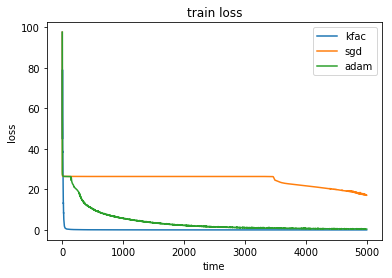

In [109]:
def plotit(fn, label, subsample=1):
  vals = np.loadtxt('data/'+fn+".csv", delimiter=",")
  vals = vals[::subsample]
  plt.plot(vals, label=label)
  
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plotit('losses_sgd_kfac', 'kfac')
plotit('losses_sgd', 'sgd', 4)
plotit('losses_adam', 'adam', 4)

plt.xlabel('time')
plt.ylabel('loss')
plt.title('train loss')

plt.legend()
plt.show()

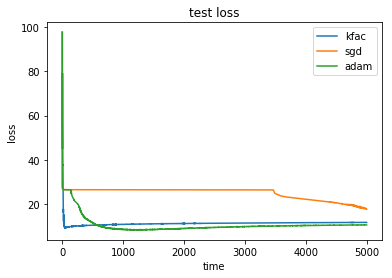

In [110]:
plt.figure()
plotit('vlosses_sgd_kfac', 'kfac')
plotit('vlosses_sgd', 'sgd', 4)
plotit('vlosses_adam', 'adam', 4)

plt.xlabel('time')
plt.ylabel('loss')
plt.title('test loss')

plt.legend()
plt.show()

- final test loss is higher for KFAC (8.48 Adam vs 9.4 KFAC)
- KFAC takes 100x less iteration
- KFAC takes 25x less wall-clock time

# Line-search

In [18]:
# globals: train_data, model
def copy_parameters():
    original_param_data_list = []
    for p in model.parameters():
        param_data = p.data.new(p.size())
        param_data.copy_(p.data)
        original_param_data_list.append(param_data)
    return original_param_data_list

def reset_parameters():
    original_param_data_list = []
    for current_param, param0 in zip(model.parameters(), parameters0):
        current_param.data.copy_(param0)

def zero_grad():
    for p in model.parameters():
        if p.grad is not None:
            p.grad.detach_()
            p.grad.zero_()
            
def compute_loss():
    error = model(train_data)-train_data
    return torch.sum(error*error).detach().cpu().numpy()/2/dsize

def advance(lr, layer_idx=-1):
    """Advances model parameters in direction of gradient by fraction lr"""
    params = list(model.parameters())
    if layer_idx == -1:
        pass
    elif isinstance(layer_idx, collections.Iterable):
        params = [params[k] for k in layer_idx]
    else:
        params = [params[layer_idx]]
    for p in params:
        p.data.add_(lr, p.grad.data)
        #p.data.copy_(p.data + lr*p.grad.data)
        
dsize=10000
dtype=np.float32
fs = [dsize, 28*28, 1024, 1024, 1024, 196, 1024, 1024, 1024, 28*28]
n = len(fs) - 2   # number of matmuls

images = u.get_mnist_images()
train_data0 = images[:, :dsize].astype(dtype)
train_data = torch.from_numpy(train_data0).cuda()

In [44]:
dsize=10000
losses_adam, vlosses_adam, model, optimizer = kfac_lib.train(iters=10, kfac=True, print_interval=1)
lr=0.2
parameters0=copy_parameters()
u.summarize_time()
print(compute_loss())

333.07138 16.215998 0.003562413
333.11588 213.80965 0.0054814345
332.8337 317.73743 0.01835288
331.43625 332.5502 -0.017879274
331.50504 333.22778 0.011754902
323.35406 333.33163 -8.210582e-05
292.7636 333.33325 -0.000106892345
333.33334 333.33334 0.0
Step   0 loss 97.542419434
333.07138 16.459383 0.004446621
333.11588 214.2757 0.0043577813
332.8337 317.4351 0.019629562
331.43625 332.55252 0.0029117898
331.50504 333.20096 -0.14913012
323.35406 333.33112 -0.0022334666
292.7636 333.33322 -0.0005690639
333.33334 333.33334 0.0
Step   1 loss 97.542419434
333.22577 20.615538 0.00080219563
333.20184 240.48346 0.0075333323
332.861 322.14603 0.023042805
331.46686 332.59506 0.022067953
331.4227 332.9161 -0.61164653
323.35437 333.29144 0.058548294
292.7667 333.33267 -0.0036975553
333.33334 333.33224 0.0
Step   2 loss 62.600799561
333.30945 41.07547 -0.004107486
333.18222 295.42734 0.057969157
332.77432 327.06195 0.1961581
329.5681 332.81116 0.5207624
331.42923 332.6697 -0.32648948
323.30383 332.0

In [21]:
reset_parameters()
print(compute_loss())
optimizer.step()
print(compute_loss())

35.115584375
32.303740625


In [142]:
reset_parameters()
print(compute_loss())
advance(-0.2, -1)
print(compute_loss())

35.115584375
32.303740625


32.25153125 29


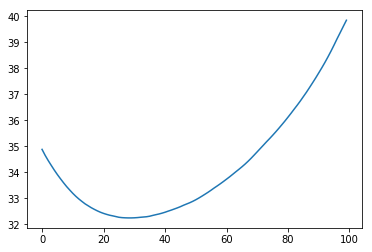

In [118]:
# update both
reset_parameters()
vals = []
n=100
lr=0.2
for i in range(n):
    advance(-4*lr/n, -1)
    vals.append(compute_loss())
    
import matplotlib.pyplot as plt
plt.plot(vals)
print(min(vals), np.argmin(vals))

32.78886875 61


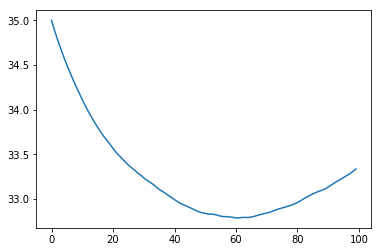

In [119]:
# update even
reset_parameters()
vals = []
n=100
lr=0.2
for i in range(n):
    advance(-4*lr/n, [0, 2, 4, 6])
    vals.append(compute_loss())
    
plt.plot(vals)
print(min(vals), np.argmin(vals))

32.172759375 57


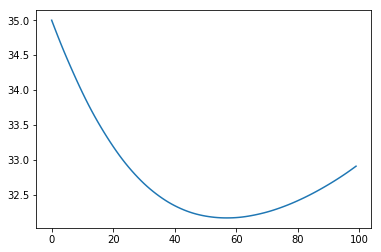

In [120]:
# update odd
reset_parameters()
vals = []
n=100
lr=0.2
for i in range(n):
    advance(-4*lr/n, [1, 3, 5, 7])
    vals.append(compute_loss())
    
plt.plot(vals)
print(min(vals), np.argmin(vals))

## Per-layer loss curves

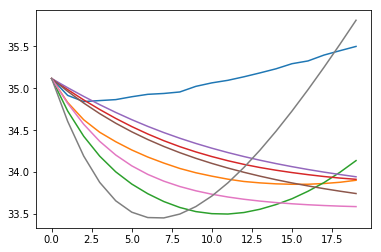

In [143]:
n = 8
num_points=20
val_array = []
for layer_idx in range(n):
    vals = []
    reset_parameters()
    for i in range(num_points):
        error = model(train_data)-train_data
        vals.append(compute_loss())
        advance(-8*lr/num_points, layer_idx)
    plt.plot(vals)
    val_array.append(vals)
reset_parameters()

In [144]:
print(compute_loss())
print()
for i,param in enumerate(model.parameters()):
    print(i, torch.norm(param.grad).detach().cpu().numpy())

35.115584375

0 343.39893
1 805.7693
2 592.3137
3 263.5462
4 93.90721
5 239.44008
6 317.31122
7 204.03316


In [103]:
8*lr

1.6

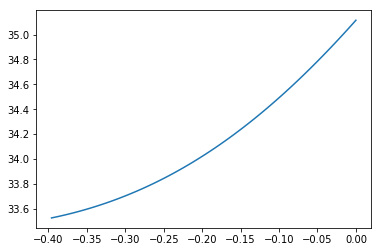

In [104]:
vals = []
reset_parameters()
position = 0
xs = []
ys = []
for i in range(num_points):
    xs.append(position)
    error = model(train_data)-train_data
    ys.append(compute_loss())
    position-=2*lr/num_points
    advance(-2*lr/num_points, 7)
plt.plot(xs,ys)
reset_parameters()

## Predicted curves

Sanity check, compute gradient manually, compare to grad

In [22]:
all_params = list(model.parameters())

In [23]:
all_params[7].grad

tensor([[-0.0804, -0.0025, -0.0008,  ..., -0.0196,  0.0151,  0.0230],
        [ 0.0763, -0.0076, -0.0008,  ...,  0.0334,  0.0172,  0.0294],
        [ 0.0370, -0.0068,  0.0081,  ...,  0.0792,  0.0704,  0.0148],
        ...,
        [-0.0071,  0.0030, -0.0007,  ...,  0.0024, -0.0247,  0.0536],
        [ 0.0041,  0.0004,  0.0048,  ..., -0.0041, -0.0577, -0.0389],
        [ 0.0125,  0.0034,  0.0097,  ...,  0.0688,  0.0830, -0.0124]],
       device='cuda:0')

In [228]:
kfac_lib.B_saved

[None, None, None, None, None, None, None, None]

In [156]:
A = kfac_lib.A_saved[7]
B = kfac_lib.BB_saved[0].cuda()
covA = kfac_lib.covA_saved[7]
covB = kfac_lib.covB_saved[7]
grad = B@A.t()
grad_pre = inv(covB) @ grad @ inv(covA)

In [157]:
grad_pre

tensor([[-0.0050,  0.0086,  0.0053,  ..., -0.0068,  0.0127, -0.0055],
        [-0.0069, -0.0022,  0.0021,  ..., -0.0055,  0.0014,  0.0130],
        [-0.0035,  0.0145, -0.0003,  ...,  0.0001, -0.0082, -0.0018],
        ...,
        [ 0.0015, -0.0013, -0.0020,  ...,  0.0015, -0.0019,  0.0074],
        [-0.0037,  0.0001,  0.0126,  ..., -0.0116, -0.0030, -0.0075],
        [ 0.0076,  0.0005,  0.0051,  ...,  0.0037,  0.0013,  0.0003]],
       device='cuda:0')

In [208]:
all_params[7].grad

tensor([[-0.0804, -0.0025, -0.0008,  ..., -0.0196,  0.0151,  0.0230],
        [ 0.0763, -0.0076, -0.0008,  ...,  0.0334,  0.0172,  0.0294],
        [ 0.0370, -0.0068,  0.0081,  ...,  0.0792,  0.0704,  0.0148],
        ...,
        [-0.0071,  0.0030, -0.0007,  ...,  0.0024, -0.0247,  0.0536],
        [ 0.0041,  0.0004,  0.0048,  ..., -0.0041, -0.0577, -0.0389],
        [ 0.0125,  0.0034,  0.0097,  ...,  0.0688,  0.0830, -0.0124]],
       device='cuda:0')

In [171]:
grad = B@A.t()
term1=torch.sum((covB@grad_pre@covA)*grad).cpu().numpy()
term2=torch.sum(grad*grad_pre).cpu().numpy()
loss0 = compute_loss()

In [172]:
term1, term2, loss0, -term2/term1

(array(314.05475, dtype=float32),
 array(14.792625, dtype=float32),
 6.74078125,
 -0.04710206)

In [173]:
def curve_eval(eps):
    return loss0+0.5*eps*term1*eps+eps*term2

In [174]:
-term2/term1

-0.04710206

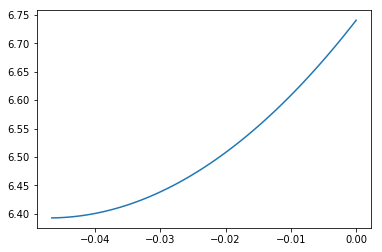

In [175]:
num_points = 100
cutoff = term2/term1
xs2=np.arange(0, -cutoff, -cutoff/num_points)
ys2=[curve_eval(x) for x in xs2]
plt.plot(xs2, ys2)

In [ ]:
num_points = 100
cutoff = term2/term1
xs2=np.arange(0, -cutoff, -cutoff/num_points)
ys2=[curve_eval(x) for x in xs2]
plt.plot(xs2, ys2)

## Try with linear losses

In [263]:
dsize=10000
def identity(x): return x

lr = 0.02
losses_adam, vlosses_adam, model, optimizer = kfac_lib.train(iters=10, kfac=True, nonlin=identity, print_interval=1, lr=lr)

parameters0=copy_parameters()
u.summarize_time()
print(compute_loss())

Step   0 loss 66.862487793
Step   1 loss 66.862487793
Step   2 loss 52.893703461
Step   3 loss 41.948528290
Step   4 loss 31.875167847
Step   5 loss 23.392860413
Step   6 loss 17.248321533
Step   7 loss 12.925563812
Step   8 loss 9.896621704
Step   9 loss 7.716422558
Times: min: 533.94, median: 551.49, mean: 660.07
6.125259375


In [240]:
dsize=10000
def identity(x): return x

lr = 0.02
losses_adam, vlosses_adam, model, optimizer = kfac_lib.train(iters=10, kfac=True, nonlin=identity, print_interval=1, lr=lr)

parameters0=copy_parameters()
u.summarize_time()
print(compute_loss())

Step   0 loss 66.862487793
Step   1 loss 66.862487793
Step   2 loss 52.972522736
Step   3 loss 42.015956879
Step   4 loss 31.953170776
Step   5 loss 23.487474442
Step   6 loss 17.305208206
Step   7 loss 12.957129478
Step   8 loss 9.876223564
Step   9 loss 7.697070122
Times: min: 528.46, median: 549.88, mean: 657.01
6.103077734375


In [264]:
all_params = list(model.parameters())
loss0 = compute_loss()

A = kfac_lib.A_saved[7]
B = kfac_lib.BB_saved[0].cuda()
covA = kfac_lib.covA_saved[7]
covB = kfac_lib.covB_saved[7]

grad = B@A.t()
grad_pre = inv(covB, lambda_=1e-3) @ grad @ inv(covA, lambda_=1e-3)

term1=torch.sum((covB@grad_pre@covA)*grad_pre).cpu().numpy()
term2=torch.sum(grad*grad_pre).cpu().numpy()
loss0 = compute_loss()

In [265]:
grad_pre/all_params[7].grad

tensor([[1.0062, 0.9997, 1.0035,  ..., 0.9994, 0.9991, 0.9980],
        [1.0168, 0.9545, 0.9020,  ..., 0.9927, 0.9905, 1.0024],
        [0.9949, 1.0009, 0.9945,  ..., 0.9964, 0.9990, 1.0503],
        ...,
        [0.9978, 0.9761, 0.9954,  ..., 0.9974, 0.9989, 1.0000],
        [1.0223, 1.0173, 1.0012,  ..., 0.9965, 1.0024, 1.0005],
        [0.9973, 0.9973, 0.9985,  ..., 1.0019, 0.9972, 1.0041]],
       device='cuda:0')

In [266]:
term1, term2, loss0, -term2/term1

(array(13.622598, dtype=float32),
 array(13.704137, dtype=float32),
 6.125259375,
 -1.0059856)

### Observed curve on last layer

In [243]:
max_range

1.0211469

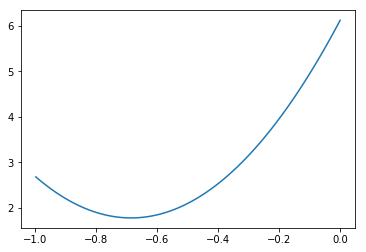

In [267]:
num_points=100
vals = []
reset_parameters()
position = 0
xs = []
ys = []
max_range=term2/term1
increment=max_range/num_points
for i in __builtins__.range(num_points):
    xs.append(position)
    ys.append(compute_loss())
    position-=increment
    advance(-increment, 7)
plt.plot(xs,ys)
reset_parameters()

### Predicted curve on last layer

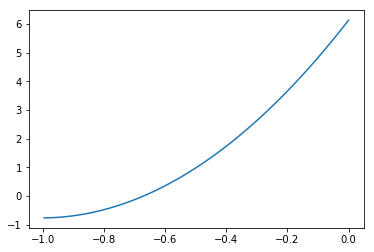

In [273]:
num_points = 100
cutoff = term2/term1
xs2=np.arange(0, -cutoff, -cutoff/num_points)
ys2=[curve_eval(x) for x in xs2]
plt.plot(xs2, ys2)

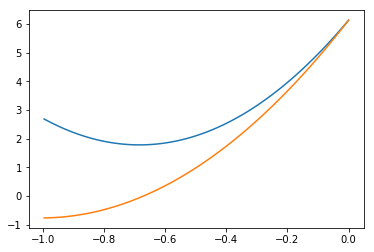

In [274]:
plt.plot(xs, ys, xs2, ys2)

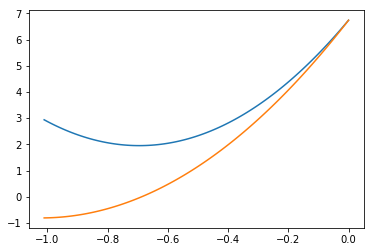

In [221]:
plt.plot(xs, ys, xs2, ys2)

### Tweaking

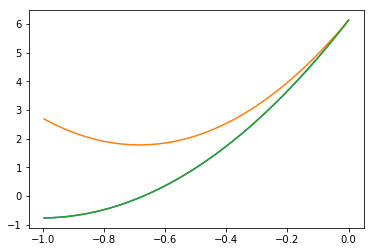

In [271]:
def curve_eval2(eps):
    return loss0+0.5*eps*term1*eps+eps*term2

num_points = 100
cutoff = term2/term1
xs3=np.arange(0, -cutoff, -cutoff/num_points)
ys3=[curve_eval2(x) for x in xs2]
plt.plot(xs2, ys2)

plt.plot(xs, ys, xs3, ys3)

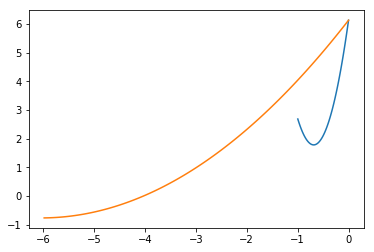

In [272]:
def curve_eval2(eps):
    return loss0+0.5*eps*term1*eps+eps*term2

num_points = 100
cutoff = 6*term2/term1
xs3=np.arange(0, -cutoff, -cutoff/num_points)
ys3=[curve_eval2(x) for x in xs2]
plt.plot(xs, ys, xs3, ys3)

# Scratch

In [4]:
images = u.get_mnist_images()

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.


In [6]:
im0=images

In [10]:
images[:,0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
im0=images[:,0].reshape((28,28))

In [35]:
images[:,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:
from PIL import Image
pilim0 = Image.fromarray(im0)

In [19]:
pilim1 = pilim0.resize((8, 8))

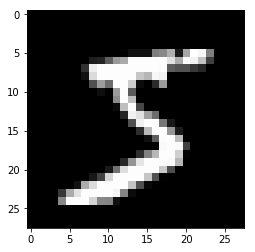

In [38]:
matplotlib.pyplot.imshow(Image.fromarray(im0*255))

In [ ]:
Image.fromarray(im0).resize((8,8), Image.ANTIALIAS).

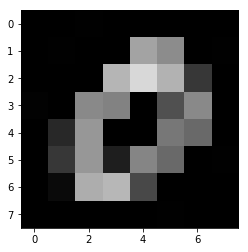

In [32]:
matplotlib.pyplot.imshow(Image.fromarray(im0).resize((8,8), Image.ANTIALIAS))

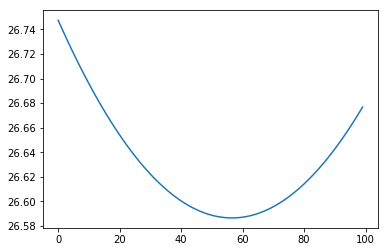

In [58]:
reset_parameters(model)
vals = []
reset_parameters(model)
for i in range(100):
    advance(model, -.002)
    error = model(train_data)-train_data
    vals.append(torch.sum(error*error).detach().cpu().numpy()/2/dsize)
    
import matplotlib.pyplot as plt
plt.plot(vals)

### Optimize for one layer

In [135]:
losses_adam, vlosses_adam, model, optimizer = kfac_lib.train(iters=10, kfac=True, print_interval=1)
parameters0=copy_parameters(model)
u.summarize_time()
loss0 = compute_loss()

n = 8
val_array = []
for layer_idx in range(n):
    vals = []
    reset_parameters(model)
    for i in range(10):
        error = model(train_data)-train_data
        vals.append(compute_loss())
        advance(model, -.2/n, layer_idx)
    plt.plot(vals)
    val_array.append(vals)
reset_parameters()

NameError: name 'print_inte3rval' is not defined

In [44]:
compute_loss()

30.438815625

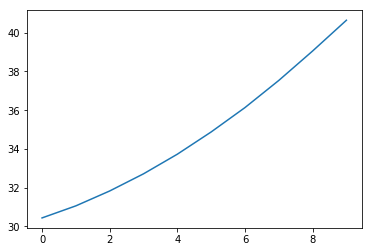

In [32]:
vals = []
reset_parameters(model)
for i in range(10):
    error = model(train_data)-train_data
    vals.append(compute_loss())
    advance(model, -.2/n, -1)
plt.plot(vals)

In [33]:
reset_parameters(model)
compute_loss()

30.438815625

In [31]:
for i,param in enumerate(model.parameters()):
    print(i, torch.norm(param.grad).detach().cpu().numpy())

0 595.64026
1 1076.6353
2 725.04865
3 294.54898
4 103.23652
5 341.41153
6 348.4198
7 232.39833


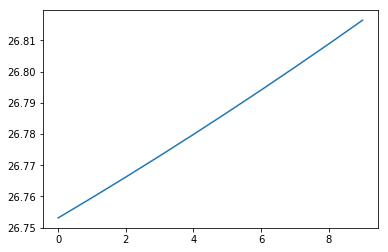

In [134]:
val_array = []
reset_parameters(model)
for layer_idx in [-1]:
    vals = []
    reset_parameters(model)
    for i in range(10):
        error = model(train_data)-train_data
        vals.append(torch.sum(error*error).detach().cpu().numpy()/2/dsize)
        advance(model, -.002, layer_idx)
    plt.plot(vals)
    val_array.append(vals)

In [141]:
reset_parameters(model)
print(compute_loss())

26.7531


In [143]:
reset_parameters(model)
advance(model, -0.2)
compute_loss()

28.004078125

In [ ]:
Step   9 loss 26.863996506
Step  10 loss 26.753099442
Step  11 loss 26.676715851
